In [409]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function for adding Gaussian noise to the original image

In [410]:
def add_gaussian_noise(image, mean=0, stddev=25):     # dafault value of mean=0 and standard daviation=25
    gaussian_noise = np.random.normal(mean, stddev, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

Function for Butterworth Lowpass Filter

In [411]:
def butterworth_lowpass_filter(image, order, cut_off_frequency):
    height, width = image.shape   
    F = np.fft.fftshift(np.fft.fft2(image))
    H = np.zeros(image.shape, dtype=np.float32)

    n = order
    d0 = cut_off_frequency
    for u in range(height):
        for v in range(width):
            d = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            H[u, v] = 1 / (1 + (d / d0) ** (2 * n))

    G = F * H
    filteredImage = np.fft.ifft2(np.fft.ifftshift(G))
    return np.abs(filteredImage)

Function for Gaussian Lowpass Filter

In [412]:
def gaussian_lowpass_filter(image, cutoff_frequency):
    height, width = image.shape
    H = np.zeros(image.shape, dtype=np.float32)
    F = np.fft.fftshift(np.fft.fft2(image))

    D0 = cutoff_frequency
    for u in range(height):
        for v in range(width):
            d = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
            H[u, v] = np.exp(-(d ** 2) / (2 * (D0 ** 2)))

    G = F * H
    filtered_image = np.fft.ifft2(np.fft.fftshift(G))
    return np.abs(filtered_image)


Calculate PSNR

In [413]:
def cal_PSNR(original_image, noisy_image):
    original_image, noisy_image = np.float64(original_image), np.float64(noisy_image)

    Imax = 255.0
    mse = np.mean((original_image - noisy_image) ** 2)
    PSNR_val = 20 * np.log10(Imax / np.sqrt(mse))

    return round(PSNR_val, 2)

Loading the original image

In [414]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))

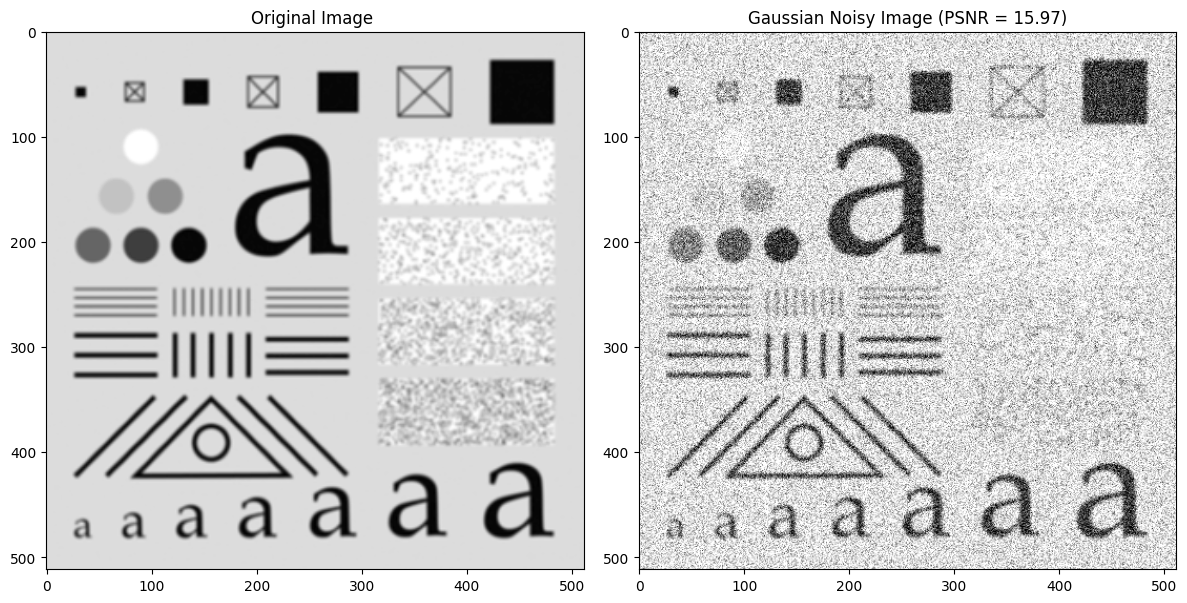

In [415]:
gaussian_noisy_image = add_gaussian_noise(gray_image, 0, 50)
gaussian_noise_PSNR = cal_PSNR(gray_image, gaussian_noisy_image)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image ")

plt.subplot(1, 2, 2)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title(f"Gaussian Noisy Image (PSNR = {gaussian_noise_PSNR})")

plt.tight_layout()
plt.show()

Function for Butterworth and Gaussian Lowpass Filter

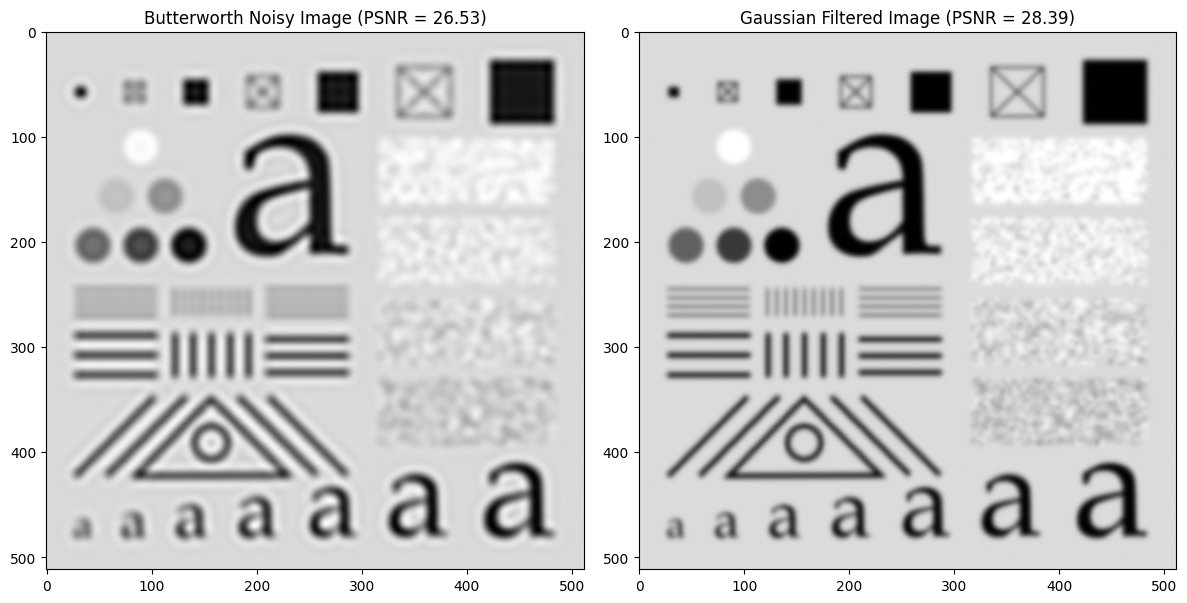

In [416]:
order = 4
cutoff_frequency = 40

butterworth_filtered_image = butterworth_lowpass_filter(gray_image, order, cutoff_frequency)
gaussian_filtered_image = gaussian_lowpass_filter(gray_image, cutoff_frequency)

butterworth_PSNR = cal_PSNR(gray_image, butterworth_filtered_image)
gaussian_filtered_PSNR = cal_PSNR(gray_image, gaussian_filtered_image)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(butterworth_filtered_image, cmap='gray')
plt.title(f"Butterworth Noisy Image (PSNR = {butterworth_PSNR})")

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title(f"Gaussian Filtered Image (PSNR = {gaussian_filtered_PSNR})")

plt.tight_layout()
plt.show()